In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from ast import literal_eval
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pwd

/content


In [4]:
%cd drive/My Drive/Colab Notebooks/Music Mood Recognition

/content/drive/My Drive/Colab Notebooks/Music Mood Recognition


In [5]:
!ls

1_Scraping.ipynb			    auth.py		    __pycache__
2_EDA					    data		    scrapes
3_Modeling_with_preexisting_features.ipynb  EDA.py		    Scraping.py
4_feature_engineering.ipynb		    funcs.ipynb		    test.mp3
5_modeling-with-extracted-features.ipynb    funcs.py
6_Play.ipynb				    GenreTraniningModel.h5


In [6]:
tqdm.pandas()

In [7]:
songs = pd.read_csv('./data/five_g_500_modeling.csv', encoding='utf-8')

In [8]:
songs.columns[22:]

Index(['min_energy', 'max_energy', 'max_rms', 'std_rms', 'median_rms',
       'min_rms', 'mfcc_mean_00', 'mfcc_mean_01', 'mfcc_mean_02',
       'mfcc_mean_03',
       ...
       'mfcc_min_16', 'mfcc_min_17', 'mfcc_min_18', 'mfcc_min_19',
       'mfcc_min_20', 'mfcc_min_21', 'mfcc_min_22', 'mfcc_min_23',
       'mfcc_min_24', 'mfcc_min_25'],
      dtype='object', length=110)

In [9]:
songs.columns

Index(['id', 'genre', 'track_name', 'location', 'preview_url', 'filename',
       'artist', 'danceability', 'energy', 'key',
       ...
       'mfcc_min_16', 'mfcc_min_17', 'mfcc_min_18', 'mfcc_min_19',
       'mfcc_min_20', 'mfcc_min_21', 'mfcc_min_22', 'mfcc_min_23',
       'mfcc_min_24', 'mfcc_min_25'],
      dtype='object', length=132)

In [10]:
features = songs.columns[22:].drop([])

In [11]:
X = songs[features]
y = songs['mood']

In [12]:
X

,min_energy,max_energy,max_rms,std_rms,median_rms,min_rms,mfcc_mean_00,mfcc_mean_01,mfcc_mean_02,mfcc_mean_03,mfcc_mean_04,mfcc_mean_05,mfcc_mean_06,mfcc_mean_07,mfcc_mean_08,mfcc_mean_09,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20,mfcc_mean_21,mfcc_mean_22,mfcc_mean_23,mfcc_mean_24,mfcc_mean_25,mfcc_std_00,mfcc_std_01,mfcc_std_02,mfcc_std_03,mfcc_std_04,mfcc_std_05,mfcc_std_06,mfcc_std_07,...,mfcc_max_12,mfcc_max_13,mfcc_max_14,mfcc_max_15,mfcc_max_16,mfcc_max_17,mfcc_max_18,mfcc_max_19,mfcc_max_20,mfcc_max_21,mfcc_max_22,mfcc_max_23,mfcc_max_24,mfcc_max_25,mfcc_min_00,mfcc_min_01,mfcc_min_02,mfcc_min_03,mfcc_min_04,mfcc_min_05,mfcc_min_06,mfcc_min_07,mfcc_min_08,mfcc_min_09,mfcc_min_10,mfcc_min_11,mfcc_min_12,mfcc_min_13,mfcc_min_14,mfcc_min_15,mfcc_min_16,mfcc_min_17,mfcc_min_18,mfcc_min_19,mfcc_min_20,mfcc_min_21,mfcc_min_22,mfcc_min_23,mfcc_min_24,mfcc_min_25
0,1.644807,116.756263,0.477535,0.048703,0.166074,0.056679,-127.349106,172.76286,-38.939200,42.690353,-12.771213,18.509100,-7.186359,15.227067,6.036448,2.801440,-0.160158,5.438214,8.293221,0.844505,5.067380,0.737326,0.218372,-4.658627,4.517788,-3.578461,0.551073,-5.369173,2.078407,4.616948,0.898848,-0.703809,25.609026,13.314389,8.848237,13.358882,9.341359,8.797725,8.701000,8.350511,...,31.872550,27.422318,27.644253,32.934060,22.241684,18.355106,26.038437,13.258681,23.961468,14.948800,26.414670,29.205647,23.477894,29.059437,-193.28047,131.97330,-72.549790,-3.213114,-40.611450,-9.244274,-36.444810,-13.314804,-18.744518,-24.979301,-24.121590,-18.844360,-17.407686,-21.695786,-20.316029,-20.502102,-20.787334,-25.312674,-17.928000,-27.247902,-21.355286,-27.904734,-21.350882,-22.807076,-22.335728,-23.736908
1,1.644807,116.756263,0.477535,0.048703,0.166074,0.056679,-127.349106,172.76286,-38.939200,42.690353,-12.771213,18.509100,-7.186359,15.227067,6.036448,2.801440,-0.160158,5.438214,8.293221,0.844505,5.067380,0.737326,0.218372,-4.658627,4.517788,-3.578461,0.551073,-5.369173,2.078407,4.616948,0.898848,-0.703809,25.609026,13.314389,8.848237,13.358882,9.341359,8.797725,8.701000,8.350511,...,31.872550,27.422318,27.644253,32.934060,22.241684,18.355106,26.038437,13.258681,23.961468,14.948800,26.414670,29.205647,23.477894,29.059437,-193.28047,131.97330,-72.549790,-3.213114,-40.611450,-9.244274,-36.444810,-13.314804,-18.744518,-24.979301,-24.121590,-18.844360,-17.407686,-21.695786,-20.316029,-20.502102,-20.787334,-25.312674,-17.928000,-27.247902,-21.355286,-27.904734,-21.350882,-22.807076,-22.335728,-23.736908
2,2.655552,135.200287,0.513871,0.064239,0.214261,0.072018,-148.873180,199.02914,-28.306532,28.042295,6.357623,22.653368,2.170722,0.402468,5.915420,-2.561953,-1.388962,2.214150,0.437246,-0.281718,0.885915,-1.332352,-5.716111,-11.761327,-6.802452,-5.181297,1.643935,-8.627007,-8.971433,-5.076137,-8.398148,-3.112567,22.373587,10.508486,7.260468,8.017689,8.040380,6.954758,7.259607,6.274192,...,23.659058,19.108994,17.151405,18.566960,18.014603,7.261351,11.846397,10.730329,17.380545,8.261864,12.972477,17.918606,15.100071,22.553026,-226.27313,136.90302,-54.610203,-2.272873,-31.165680,2.663933,-22.652641,-18.004036,-15.438351,-18.560585,-17.594286,-18.073162,-23.329983,-22.072754,-16.755466,-21.879902,-24.625935,-29.840353,-24.435170,-26.639800,-13.015192,-30.933613,-31.009972,-23.414818,-27.495190,-21.081050
3,0.206250,77.149187,0.388178,0.071069,0.164304,0.020071,-279.055800,210.87660,26.417038,25.548689,20.504130,10.548943,12.182817,1.136880,-2.104531,-2.801512,3.670099,7.862539,4.411533,2.838785,-2.436717,-3.817168,1.277163,5.897976,9.667386,9.879725,7.679604,5.585785,3.180242,-1.790981,-4.787462,0.710966,30.734867,21.744806,9.695580,8.462115,7.064418,5.692534,8.126071,7.115287,...,32.045130,22.025616,14.643316,19.454430,26.263160,30.156471,36.300780,32.983673,29.479868,29.968897,23.530907,16.506454,15.849078,23.285229,-358.00967,144.08603,-8.037516,-7.282618,1.013733,-10.598142,-10.1

In [13]:
print(X)

     min_energy  max_energy   max_rms  ...  mfcc_min_23  mfcc_min_24  mfcc_min_25
0      1.644807  116.756263  0.477535  ...   -22.807076   -22.335728   -23.736908
1      1.644807  116.756263  0.477535  ...   -22.807076   -22.335728   -23.736908
2      2.655552  135.200287  0.513871  ...   -23.414818   -27.495190   -21.081050
3      0.206250   77.149187  0.388178  ...   -20.551700   -23.509377   -20.663221
4      0.161237   99.823384  0.441551  ...   -30.409653   -24.557234   -19.500881
..          ...         ...       ...  ...          ...          ...          ...
145    0.153432  153.029241  0.546704  ...   -19.272034   -28.482393   -26.102446
146    0.071057  137.681582  0.518565  ...   -35.508640   -35.608660   -43.181614
147    0.715617   92.574139  0.425216  ...   -29.254356   -19.022900   -19.381248
148    0.155498  116.416228  0.476839  ...   -23.833050   -27.049900   -23.111070
149    0.004826  104.938407  0.452723  ...   -27.456238   -34.300980   -29.275444

[150 rows x 110

In [14]:
def running_models(X, y, scaled=False, c=10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)
    
    # MODELING WITH SCALED FEATURES #
    
    # Scale the features
    sc = StandardScaler()
    X_train_sc = sc.fit_transform(X_train)
    X_test_sc = sc.transform(X_test)
    
    # Creating a df to display results
    model_df = pd.DataFrame(columns=['train_score', 'test_score'])
    
    model_sc = SVC(C=c, kernel='rbf', degree=3)
    model_sc.fit(X_train_sc, y_train)
    train_score = model_sc.score(X_train_sc, y_train)
    test_score = model_sc.score(X_test_sc, y_test)
    
    row = {'model': type(model_sc).__name__,
           'train_score' : train_score,
          'test_score' : test_score,
           'C': c,
          'scaled': True}
    model_df = model_df.append(row, ignore_index=True)
    
    # MODELING WITH UNSCALED FEATURES #
    
    model = SVC(C=c, kernel='rbf', degree=3)
    model.fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    row = {'model': type(model).__name__,
       'train_score' : train_score,
      'test_score' : test_score,
       'C': c,
      'scaled': False}
    model_df = model_df.append(row, ignore_index=True)
    return model_df

In [15]:
running_models(X, y)

,train_score,test_score,C,model,scaled
0,0.982143,0.868421,10.0,SVC,1.0
1,0.669643,0.684211,10.0,SVC,0.0


In [16]:
# Create train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)

# Scale the features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [17]:
model = SVC(C=.35)
model.fit(X_train_sc, y_train)

SVC(C=0.35)

In [18]:
y_preds = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [19]:
categories = list(set(y_preds))
numbers = list(range(5))

In [20]:
y_preds = model.predict(X_test_sc)

In [21]:
results = X_test.copy()

In [22]:
results.loc[:, 'mood'] = y_test.copy()

In [23]:
results.loc[:, 'preds'] = y_preds.copy()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


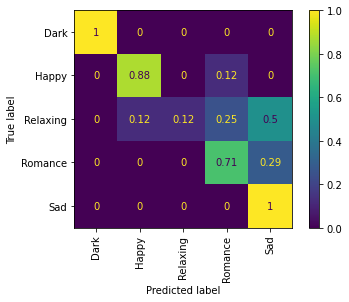

In [24]:
plot_confusion_matrix(model, X_test_sc, y_test, xticks_rotation='vertical', normalize='true');

In [25]:
results_wrong = results[results['mood'] != results['preds']]

In [26]:
songs_wrong = songs.loc[results_wrong.index, ['track_name']]

In [27]:
results_wrong['track_name'] = songs_wrong

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
results_wrong[(results_wrong['preds'] == 'Relaxing') & (results_wrong['mood'] == 'Romance')].head()

,min_energy,max_energy,max_rms,std_rms,median_rms,min_rms,mfcc_mean_00,mfcc_mean_01,mfcc_mean_02,mfcc_mean_03,mfcc_mean_04,mfcc_mean_05,mfcc_mean_06,mfcc_mean_07,mfcc_mean_08,mfcc_mean_09,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20,mfcc_mean_21,mfcc_mean_22,mfcc_mean_23,mfcc_mean_24,mfcc_mean_25,mfcc_std_00,mfcc_std_01,mfcc_std_02,mfcc_std_03,mfcc_std_04,mfcc_std_05,mfcc_std_06,mfcc_std_07,...,mfcc_max_15,mfcc_max_16,mfcc_max_17,mfcc_max_18,mfcc_max_19,mfcc_max_20,mfcc_max_21,mfcc_max_22,mfcc_max_23,mfcc_max_24,mfcc_max_25,mfcc_min_00,mfcc_min_01,mfcc_min_02,mfcc_min_03,mfcc_min_04,mfcc_min_05,mfcc_min_06,mfcc_min_07,mfcc_min_08,mfcc_min_09,mfcc_min_10,mfcc_min_11,mfcc_min_12,mfcc_min_13,mfcc_min_14,mfcc_min_15,mfcc_min_16,mfcc_min_17,mfcc_min_18,mfcc_min_19,mfcc_min_20,mfcc_min_21,mfcc_min_22,mfcc_min_23,mfcc_min_24,mfcc_min_25,mood,preds,track_name


In [29]:
group_preds = results_wrong.groupby('preds').mean()

In [30]:
# Getting columns where rap and r&b are very close to each other
# group_preds.columns[abs(group_preds.loc['Relaxing']) - abs(group_preds.loc['Romance']) < 0.001]

In [31]:
X

,min_energy,max_energy,max_rms,std_rms,median_rms,min_rms,mfcc_mean_00,mfcc_mean_01,mfcc_mean_02,mfcc_mean_03,mfcc_mean_04,mfcc_mean_05,mfcc_mean_06,mfcc_mean_07,mfcc_mean_08,mfcc_mean_09,mfcc_mean_10,mfcc_mean_11,mfcc_mean_12,mfcc_mean_13,mfcc_mean_14,mfcc_mean_15,mfcc_mean_16,mfcc_mean_17,mfcc_mean_18,mfcc_mean_19,mfcc_mean_20,mfcc_mean_21,mfcc_mean_22,mfcc_mean_23,mfcc_mean_24,mfcc_mean_25,mfcc_std_00,mfcc_std_01,mfcc_std_02,mfcc_std_03,mfcc_std_04,mfcc_std_05,mfcc_std_06,mfcc_std_07,...,mfcc_max_12,mfcc_max_13,mfcc_max_14,mfcc_max_15,mfcc_max_16,mfcc_max_17,mfcc_max_18,mfcc_max_19,mfcc_max_20,mfcc_max_21,mfcc_max_22,mfcc_max_23,mfcc_max_24,mfcc_max_25,mfcc_min_00,mfcc_min_01,mfcc_min_02,mfcc_min_03,mfcc_min_04,mfcc_min_05,mfcc_min_06,mfcc_min_07,mfcc_min_08,mfcc_min_09,mfcc_min_10,mfcc_min_11,mfcc_min_12,mfcc_min_13,mfcc_min_14,mfcc_min_15,mfcc_min_16,mfcc_min_17,mfcc_min_18,mfcc_min_19,mfcc_min_20,mfcc_min_21,mfcc_min_22,mfcc_min_23,mfcc_min_24,mfcc_min_25
0,1.644807,116.756263,0.477535,0.048703,0.166074,0.056679,-127.349106,172.76286,-38.939200,42.690353,-12.771213,18.509100,-7.186359,15.227067,6.036448,2.801440,-0.160158,5.438214,8.293221,0.844505,5.067380,0.737326,0.218372,-4.658627,4.517788,-3.578461,0.551073,-5.369173,2.078407,4.616948,0.898848,-0.703809,25.609026,13.314389,8.848237,13.358882,9.341359,8.797725,8.701000,8.350511,...,31.872550,27.422318,27.644253,32.934060,22.241684,18.355106,26.038437,13.258681,23.961468,14.948800,26.414670,29.205647,23.477894,29.059437,-193.28047,131.97330,-72.549790,-3.213114,-40.611450,-9.244274,-36.444810,-13.314804,-18.744518,-24.979301,-24.121590,-18.844360,-17.407686,-21.695786,-20.316029,-20.502102,-20.787334,-25.312674,-17.928000,-27.247902,-21.355286,-27.904734,-21.350882,-22.807076,-22.335728,-23.736908
1,1.644807,116.756263,0.477535,0.048703,0.166074,0.056679,-127.349106,172.76286,-38.939200,42.690353,-12.771213,18.509100,-7.186359,15.227067,6.036448,2.801440,-0.160158,5.438214,8.293221,0.844505,5.067380,0.737326,0.218372,-4.658627,4.517788,-3.578461,0.551073,-5.369173,2.078407,4.616948,0.898848,-0.703809,25.609026,13.314389,8.848237,13.358882,9.341359,8.797725,8.701000,8.350511,...,31.872550,27.422318,27.644253,32.934060,22.241684,18.355106,26.038437,13.258681,23.961468,14.948800,26.414670,29.205647,23.477894,29.059437,-193.28047,131.97330,-72.549790,-3.213114,-40.611450,-9.244274,-36.444810,-13.314804,-18.744518,-24.979301,-24.121590,-18.844360,-17.407686,-21.695786,-20.316029,-20.502102,-20.787334,-25.312674,-17.928000,-27.247902,-21.355286,-27.904734,-21.350882,-22.807076,-22.335728,-23.736908
2,2.655552,135.200287,0.513871,0.064239,0.214261,0.072018,-148.873180,199.02914,-28.306532,28.042295,6.357623,22.653368,2.170722,0.402468,5.915420,-2.561953,-1.388962,2.214150,0.437246,-0.281718,0.885915,-1.332352,-5.716111,-11.761327,-6.802452,-5.181297,1.643935,-8.627007,-8.971433,-5.076137,-8.398148,-3.112567,22.373587,10.508486,7.260468,8.017689,8.040380,6.954758,7.259607,6.274192,...,23.659058,19.108994,17.151405,18.566960,18.014603,7.261351,11.846397,10.730329,17.380545,8.261864,12.972477,17.918606,15.100071,22.553026,-226.27313,136.90302,-54.610203,-2.272873,-31.165680,2.663933,-22.652641,-18.004036,-15.438351,-18.560585,-17.594286,-18.073162,-23.329983,-22.072754,-16.755466,-21.879902,-24.625935,-29.840353,-24.435170,-26.639800,-13.015192,-30.933613,-31.009972,-23.414818,-27.495190,-21.081050
3,0.206250,77.149187,0.388178,0.071069,0.164304,0.020071,-279.055800,210.87660,26.417038,25.548689,20.504130,10.548943,12.182817,1.136880,-2.104531,-2.801512,3.670099,7.862539,4.411533,2.838785,-2.436717,-3.817168,1.277163,5.897976,9.667386,9.879725,7.679604,5.585785,3.180242,-1.790981,-4.787462,0.710966,30.734867,21.744806,9.695580,8.462115,7.064418,5.692534,8.126071,7.115287,...,32.045130,22.025616,14.643316,19.454430,26.263160,30.156471,36.300780,32.983673,29.479868,29.968897,23.530907,16.506454,15.849078,23.285229,-358.00967,144.08603,-8.037516,-7.282618,1.013733,-10.598142,-10.1

In [32]:
y

0      Dark
1      Dark
2      Dark
3      Dark
4      Dark
       ... 
145     Sad
146     Sad
147     Sad
148     Sad
149     Sad
Name: mood, Length: 150, dtype: object

In [33]:
X = songs[features]
# Thanks joris on SO: https://stackoverflow.com/questions/32011359/convert-categorical-data-in-pandas-dataframe/32011969
y_cat = songs['mood'].astype('category').cat.codes

In [34]:
y = to_categorical(y_cat)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=182)

In [36]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [47]:
print(X_train_sc[0])

[-1.73555832e-01  4.11641433e+00  3.51883460e+00  4.14919457e+00
  1.27977149e+00  1.40834298e-01  1.30881666e+00 -1.06017085e+00
 -3.88008381e-01  1.01414377e+00 -6.83141863e-01  1.34505807e+00
  8.92815368e-01  1.32773568e+00  9.87194503e-01  1.11324556e+00
  2.15583311e+00  1.50785281e+00  2.17019029e+00  1.82217897e+00
  2.07792840e+00  1.75314956e+00  8.55613028e-01  1.19606601e+00
  9.92469834e-01  1.01636398e+00  1.42505114e+00  1.37851949e+00
  7.98427788e-01  8.23370571e-02  6.24071421e-01  1.22644277e+00
  4.24134746e-01 -7.64868703e-02 -6.49307745e-01  1.59641239e+00
  1.81420386e+00  3.40224375e+00  2.89769028e-01  2.92334791e-03
 -3.81345099e-01 -5.50505701e-01 -1.03435096e-01 -2.85413047e-01
 -6.42134641e-01 -9.33507436e-01 -5.26324604e-01 -7.94964868e-01
 -2.42858610e-01 -6.46236436e-01 -8.08366192e-01 -8.01752222e-01
 -1.40124300e+00 -1.52995346e+00 -1.27364666e+00 -9.25636751e-01
 -7.01377317e-01 -9.24258012e-01  2.32042204e+00 -4.26825714e-01
 -8.23051888e-01  1.95326

In [39]:
fnn_model = Sequential()

fnn_model.add(Dense(16, activation='relu', input_shape=(X_train_sc.shape[1],)))
fnn_model.add(Dense(64, activation='relu'))
fnn_model.add(Dropout(0.2))
fnn_model.add(Dense(32, activation='relu'))
fnn_model.add(Dropout(0.2))
fnn_model.add(Dense(16, activation='relu'))
fnn_model.add(Dense(5, activation='softmax'))

fnn_model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['acc'])

hist = fnn_model.fit(tf.expand_dims(X_train_sc, axis =-1), y_train,
                epochs=100,
                batch_size=128,
                validation_data=(X_test_sc, y_test),
                    use_multiprocessing=True,
                    verbose=1)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 1.6076 - acc: 0.2768 - val_loss: 1.6140 - val_acc: 0.2105
Epoch 2/100
1/1 [==============================] - 0s 69ms/step - loss: 1.5737 - acc: 0.2232 - val_loss: 1.5995 - val_acc: 0.2105
Epoch 3/100
1/1 [==============================] - 0s 59ms/step - loss: 1.5559 - acc: 0.2946 - val_loss: 1.5867 - val_acc: 0.2895
Epoch 4/100
1/1 [==============================] - 0s 65ms/step - loss: 1.5435 - acc: 0.2500 - val_loss: 1.5736 - val_acc: 0.2895
Epoch 5/100
1/1 [==============================] - 0s 64ms/step - loss: 1.5240 - acc: 0.2768 - val_loss: 1.5607 - val_acc: 0.2895
Epoch 6/100
1/1 [==============================] - 0s 69ms/step - loss: 1.4996 - acc: 0.2321 - val_loss: 1.5480 - val_acc: 0.3158
Epoch 7/100
1/1 [==============================] - 0s 56ms/step - loss: 1.4872 - acc: 0.2946 - val_loss: 1.5350 - val_acc: 0.3158
Epoch 8/100
1/1 [==============================] - 0s 66ms/step - loss: 1.4941 - acc: 0.3571

In [40]:
fnn_model.save('GenreTraniningModel.h5')

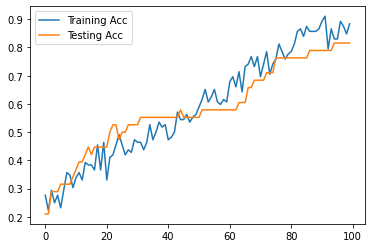

In [41]:
plt.plot(hist.history['acc'], label="Training Acc")
plt.plot(hist.history['val_acc'], label="Testing Acc")
plt.legend();